# 영상의 필터링

In [1]:
import cv2
import numpy as np
import sys

## 블러링

### 평균값 필터 

In [4]:
src = cv2.imread("./data/rose.bmp", cv2.IMREAD_GRAYSCALE)


blur3 = np.array([[1, 1, 1],
                 [1, 1, 1],
                 [1, 1, 1]], np.float32) * 1/9

blur5 = np.array([[1, 1, 1, 1, 1],
                 [1, 1, 1, 1, 1],
                 [1, 1, 1, 1, 1],
                 [1, 1, 1, 1, 1],
                 [1, 1, 1, 1, 1]], np.float32) * 1/25

dst3 = cv2.filter2D(src, -1, blur3)
dst5 = cv2.filter2D(src, -1, blur5)

cv2.imshow("src", src)
cv2.imshow("dst3", dst3)
cv2.imshow("dst5", dst5)

cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
src = cv2.imread("./data/rose.bmp", cv2.IMREAD_GRAYSCALE)

cv2.imshow("src", src)

for ksize in (3, 5, 7):
    dst = cv2.blur(src, (ksize, ksize)) # ksize :3, 5, 7
    desc = "Mean : %d x %d" % (ksize, ksize)
    cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, 255, 1, cv2.LINE_AA )
    cv2.imshow("dst", dst)
    cv2.waitKey()
    
cv2.destroyAllWindows()

### 가우시안 필터 

In [11]:
src = cv2.imread("./data/rose.bmp", cv2.IMREAD_GRAYSCALE)

cv2.imshow("src", src)

for sigma in range(1, 6):
    dst = cv2.GaussianBlur(src, (0, 0), sigma)             
    desc = "Gaussian : sigma %d" % (sigma)
    cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, 255, 1, cv2.LINE_AA )
    cv2.imshow("dst", dst)
    cv2.waitKey()
    
cv2.destroyAllWindows()

## 샤프닝 (영상 날카롭게 하기)

### 언샤프 마스크 필터

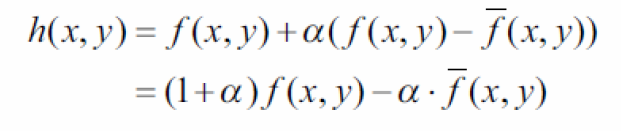

In [21]:
src = cv2.imread("./data/rose.bmp", cv2.IMREAD_GRAYSCALE)

cv2.imshow("src", src)

# option 1
# 코드에서는 alpha 값을 1로 고정하고 sigma를 늘리면서 날카로운 영상을 만들었음

for sigma in range(1, 6):
    blurred = cv2.GaussianBlur(src, (0, 0), sigma)    # sigma를 증가시키면 blur 정도가 커지므로 더 날카로운 영상을 만들 수 있음
    alpha = 1.0 # alpha 값을 증가시키면 더 날카로운 영상을 만들 수 있음
    dst = cv2.addWeighted(src, (1+alpha) , blurred, -alpha, 0)
    desc = "Gaussian : sigma %d" % (sigma)
    cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, 255, 1, cv2.LINE_AA )
    cv2.imshow("dst", dst)
    cv2.waitKey()
    
cv2.destroyAllWindows()    

In [23]:
src = cv2.imread("./data/rose.bmp", cv2.IMREAD_GRAYSCALE)
cv2.imshow("src", src)

# option 2
# 코드에서는 sigma값을 1로 고정하고 alpha 값을 늘리면서 날카로운 영상을 만들었음
for alpha in range(1, 6):
    blurred = cv2.GaussianBlur(src, (0, 0), 1)    # sigma를 증가시키면 blur 정도가 커지므로 더 날카로운 영상을 만들 수 있음
    #alpha = 1.0 # alpha 값을 증가시키면 더 날카로운 영상을 만들 수 있음
    dst = cv2.addWeighted(src, (1+alpha) , blurred, -alpha, 0)
    desc = "Gaussian sigma 1 : alpha %d" % (alpha)
    cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, 255, 1, cv2.LINE_AA )
    cv2.imshow("dst", dst)
    cv2.waitKey()
    
cv2.destroyAllWindows()       

## 잡음 제거 필터링

In [41]:
# "가우시안 잡음 모델" 원본에 추가
src = cv2.imread("./data/lenna.bmp", cv2.IMREAD_GRAYSCALE)

for stdev in [10, 20, 30]:
    noise = np.zeros(src.shape, np.int32)
    cv2.randn(noise, 0, stdev)

    dst= cv2.add(src, noise, dtype=cv2.CV_8UC1) # CV_8UC1 : 8bit unsigned integer, 1 channel
    desc = "stdev : %d" % (stdev)
    cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, 255, 1, cv2.LINE_AA )
    
    # dst_gaussian = cv2.GaussianBlur(dst, (0, 0), 1)
    
    cv2.imshow("src", src)
    cv2.imshow("dst", dst)
    # cv2.imshow("dst_gaussian", dst_gaussian) # 잡음이 제거됨과 동시에 원본의 에지도 무뎌지는 결과
    cv2.waitKey()
    
cv2.destroyAllWindows()  

## 양방향 필터

In [67]:
src = cv2.imread("./data/lenna.bmp", cv2.IMREAD_GRAYSCALE)

noise = np.zeros(src.shape, np.int32)
cv2.randn(noise, 0, 5)
dst= cv2.add(src, noise, dtype=cv2.CV_8UC1) # 원본에 noise(stddev=5)가 들어간 영상

dst_gaussian = cv2.GaussianBlur(dst, (0, 0), 1)
dst_bilateral = cv2.bilateralFilter(dst, -1, 10, 5)
# sigmaColor : 에지를 얼마나 보전할지 여부
# sigmaSpace : 얼마나 블러링을 강하게 할지 여부

cv2.imshow("src", src)
cv2.imshow("dst", dst)

cv2.imshow("dst_gaussian", dst_gaussian)
cv2.imshow("dst_bilateral", dst_bilateral)

cv2.waitKey()
    
cv2.destroyAllWindows()  

## 미디언 필터

In [68]:
import random

src = cv2.imread("./data/lenna.bmp", cv2.IMREAD_GRAYSCALE)

# salt & pepper noise 생성(전체 이미지의 1/10)
for i in range(0, int(src.size/10)): # src.size : 영상 전체의 픽셀 개수
    # 어떤 위치(x, y)에 노이즈를 넣을지 무작위수로 결정
    x = random.randint(0, src.shape[1] - 1)
    y = random.randint(0, src.shape[0] - 1)
    src[x, y] = (i % 2) * 255 # i가 짝수일 때는 0(pepper)값이 들어가고, 홀수일 때는 255(salt)가 들어가게

gaussian_blur = cv2.GaussianBlur(src, (0, 0), 1)
median_blur = cv2.medianBlur(src, 3)

cv2.imshow("src", src)

cv2.imshow("gaussian_blur", gaussian_blur)
cv2.imshow("median_blur", median_blur)

cv2.waitKey()
    
cv2.destroyAllWindows()  

# 영상의 기하학적 변환

## 어파인 변환

In [76]:
src = cv2.imread("./data/tekapo.bmp")

rows = src.shape[0] # height
cols =src.shape[1] # width

src_pts = np.array([[0, 0], [cols-1, 0], [cols-1, rows-1]], np.float32)  # 2차원 ndarray
dst_pts = np.array([[50, 50], [cols-100, 100], [cols-50, rows-50]], np.float32)

M = cv2.getAffineTransform(src_pts, dst_pts) # 2x3 어파인 변환행렬을 반환
dst = cv2.warpAffine(src, M, (0,0)) # dsize = (0, 0) : 원본 영상과 동일한 사이즈로 출력

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()    
cv2.destroyAllWindows()  

## 이동 변환

In [80]:
src = cv2.imread("./data/tekapo.bmp")

a = 150
b = 100

M = np.array([[1, 0, a],
              [0, 1, b]], np.float32)

dst = cv2.warpAffine(src, M, (0,0))
cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()    
cv2.destroyAllWindows() 

## 전단 변환

In [84]:
src = cv2.imread("./data/tekapo.bmp")

rows = src.shape[0] # height
cols =src.shape[1] # width

Mx = 0.3
M = np.array([[1, Mx, 0],
              [0, 1, 0]], np.float32)

dst = cv2.warpAffine(src, M, (int(cols+Mx*rows),rows))
cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()    
cv2.destroyAllWindows() 

## 크기 변환

In [87]:
src = cv2.imread("./data/tekapo.bmp")

rows = src.shape[0] # height : 행
cols =src.shape[1] # width : 열

Sx = 2
Sy = 2

M = np.array([[Sx, 0, 0],
              [0, Sy, 0]], np.float32)

dst = cv2.warpAffine(src, M, (int(cols*Sx),int(rows*Sy)))
cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()    
cv2.destroyAllWindows() 

In [90]:
src.shape

(480, 640, 3)

In [92]:
src = cv2.imread("./data/tekapo.bmp")

dst1 = cv2.resize(src, (1920, 1280))
dst2 = cv2.resize(src, (0, 0), fx=4, fy=4)
    
cv2.imshow("src", src)
cv2.imshow("dst1", dst1)
cv2.imshow("dst2", dst2)
cv2.waitKey()    
cv2.destroyAllWindows() 

## 회전 변환

In [97]:
src = cv2.imread("./data/tekapo.bmp")

rows = src.shape[0] # height : 행
cols =src.shape[1] # width : 열

center = cols/2, rows/2 # x, y 좌표

M = cv2.getRotationMatrix2D(center, 20, 1)
dst = cv2.warpAffine(src, M, (0, 0))

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()    
cv2.destroyAllWindows() 

In [99]:
src = cv2.imread("./data/tekapo.bmp")

dst1 = cv2.rotate(src, cv2.ROTATE_90_CLOCKWISE)
dst2 = cv2.rotate(src, cv2.ROTATE_90_COUNTERCLOCKWISE)

cv2.imshow("src", src)
cv2.imshow("dst1", dst1)
cv2.imshow("dst2", dst2)
cv2.waitKey()    
cv2.destroyAllWindows() 

## 대칭 변환

In [105]:
src = cv2.imread('./data/eastsea.bmp')
cv2.imshow("src", src)

for flip_code in [1, 0, -1]: # 양수(좌우대칭), 0(상하대칭), 음수(좌우, 상하대칭)
    dst =cv2.flip(src, flip_code)
    desc = "flipcode : %d" % (flip_code)
    cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 0, 0), 1, cv2.LINE_AA )
    cv2.imshow("dst", dst)
    cv2.waitKey()  
    
cv2.destroyAllWindows() 

## 투시변환

In [129]:
def on_mouse(event, x, y, flag, param) :
    if event == cv2.EVENT_LBUTTONDOWN :
        tmp.append([x, y])
        cv2.circle(src, (x,y), 5, (0,0,255),5)
        cv2.imshow('src', src)
        if len(tmp) == 4 :
            src_pts = np.array(tmp, dtype=np.float32)
            M = cv2.getPerspectiveTransform(src_pts, dst_pts)
            dst = cv2.warpPerspective(src,M,(w,h))
            cv2.imshow('dst', dst)
        
tmp = []            
src = cv2.imread("./data/card.bmp")
w, h = 200, 300
dst_pts = np.array([[0,0], [w-1,0], [w-1, h-1], [0,h-1]], dtype=np.float32)

cv2.imshow('src',src)
cv2.setMouseCallback('src', on_mouse)
cv2.waitKey()
cv2.destroyAllWindows()
